In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from imageio import imread
import numpy as np
import os
import pandas as pd
from scripts.CNN.train_interactions import COLUMNS, match_pred_to_gt, model
import pandas as pd
from scripts.CNN.interactions_results import toarray, tostruct
from os.path import join

In [5]:
DATA_DIR = '/home/matej/prace/ferda/data/interactions/1801_1k_36rot_single'

pd.set_option('precision', 2)

In [9]:
y_test = pd.read_csv(join(DATA_DIR, 'test.csv'))
y_train = pd.read_csv(join(DATA_DIR, 'train.csv'))

# Training Data

In [11]:
y_train.describe()

,0_x,0_y,0_major,0_minor,0_angle_deg,0_region_id,0_theta_rad,0_phi_rad,0_overlap_px,augmentation_angle_deg
count,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.0,36000.0,36000.0,36000.00
mean,100.04,100.06,66.62,18.30,184.56,33376.29,-1.0,-1.0,-1.0,175.00
std,11.57,11.57,8.86,2.99,105.01,5824.89,0.0,0.0,0.0,103.88
min,73.90,73.60,25.20,10.80,0.00,22902.00,-1.0,-1.0,-1.0,0.00
25%,90.00,90.00,63.08,16.60,92.07,28411.75,-1.0,-1.0,-1.0,87.50
50%,100.00,100.00,68.50,18.10,189.10,33035.50,-1.0,-1.0,-1.0,175.00
75%,110.00,110.00,73.40,19.80,276.80,38805.50,-1.0,-1.0,-1.0,262.50
max,125.90,125.60,78.60,34.90,359.90,43325.00,-1.0,-1.0,-1.0,350.00


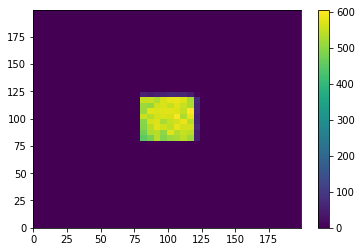

In [26]:
_ = plt.hist2d(y_train['0_x'], y_train['0_y'], bins=40, range=((0, 199), (0, 199)))
plt.colorbar()

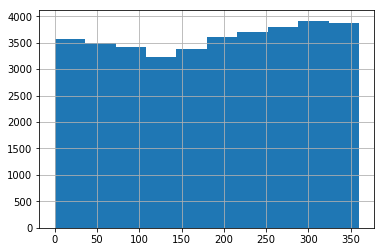

In [18]:
y_train['0_angle_deg'].hist()

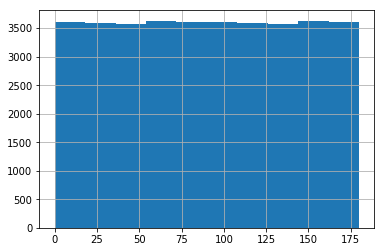

In [20]:
(y_train['0_angle_deg'] % 180).hist()

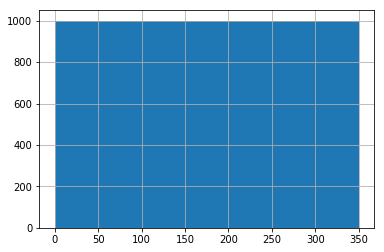

In [29]:
y_train['augmentation_angle_deg'].hist(bins=36)

# Test Data

In [22]:
y_test.describe()

,0_x,0_y,0_major,0_minor,0_angle_deg,0_region_id,0_theta_rad,0_phi_rad,0_overlap_px,augmentation_angle_deg
count,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.0,3600.0,3600.0,3600.00
mean,100.22,100.28,66.87,18.29,185.70,33206.35,-1.0,-1.0,-1.0,178.75
std,11.62,11.61,9.06,2.87,104.41,5880.65,0.0,0.0,0.0,104.45
min,77.80,75.90,25.20,10.30,0.00,22825.00,-1.0,-1.0,-1.0,0.00
25%,90.00,90.00,63.70,16.70,94.88,27981.50,-1.0,-1.0,-1.0,86.00
50%,100.00,100.10,68.90,18.20,191.35,32865.00,-1.0,-1.0,-1.0,179.00
75%,110.00,110.10,73.40,19.70,274.85,39084.25,-1.0,-1.0,-1.0,271.00
max,124.00,123.90,79.20,41.00,359.90,43322.00,-1.0,-1.0,-1.0,358.00


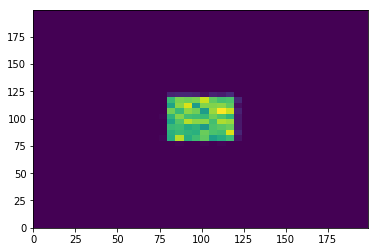

In [23]:
_ = plt.hist2d(y_test['0_x'], y_test['0_y'], bins=40, range=((0, 199), (0, 199)))

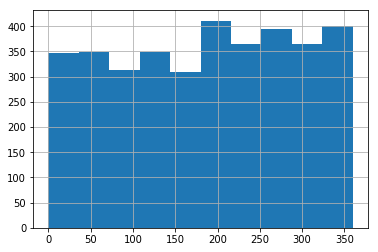

In [24]:
y_test['0_angle_deg'].hist()

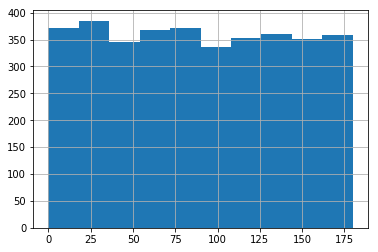

In [25]:
(y_test['0_angle_deg'] % 180).hist()